# Personal application

In [1]:
lat,lon = 48.149,11.507 # user residence
size = 50 # user area radius in km

In [2]:
!python --version
!pip install -r requirements.txt --disable-pip-version-check | tail -n 5

Python 3.12.10


In [3]:
import sys
import pandas as pd
import geopandas as gpd
import shapely as sh
import folium
from IPython.display import HTML,Image

In [4]:
data = pd.read_parquet('result-method/safeweb-DE.parquet')

data

,country,lat,lon,website,place_type
0,DE,48.3755746,8.8799844,heilpraktikerin-hoffmann.de,Commerce
1,DE,50.8614544,6.6503303,burg-bergerhausen.de,Facility
2,DE,53.6406614,7.612365,plietsch-esens.de,Facility
3,DE,50.065989,8.9672349,heidelberger-beton.de,Commerce
4,DE,52.4874831,13.4301554,campusruetli.de,Facility
...,...,...,...,...,...
170359,DE,48.3875955,10.9309495,elektro-seebach.de,Commerce
170360,DE,52.4466305,13.6273427,dergrieche-berlin.com,Facility
170361,DE,51.5073955,7.4643169,ast-dortmund.de,Facility
170362,DE,49.9760089,9.1488081,friseurmeister.org,Facility


In [5]:
data['crd'] = gpd.points_from_xy(data.lon,data.lat)
data = gpd.GeoDataFrame(data)
data.crd = data.crd.set_crs('EPSG:4326')

In [6]:
area = sh.Point(lon,lat)
area = gpd.GeoSeries(area).set_crs('EPSG:4326')
utm = area.estimate_utm_crs()
area = area.to_crs(utm)
area_whitelist = area.buffer(size*1000)
area_whitelist = area_whitelist.to_crs('EPSG:4326')
area_visual = area.buffer(3*1000)
area_visual = area_visual.to_crs('EPSG:4326')

In [7]:
data_whitelist = data.loc[data.crd.within(area_whitelist.item())]

data_whitelist

,country,lat,lon,website,place_type,crd
9,DE,48.1341707,11.5950878,hofbraeukeller.de,Facility,POINT (11.59509 48.13417)
39,DE,48.1322086,11.5456979,augustin-hotel.com,Facility,POINT (11.54570 48.13221)
68,DE,48.1516212,11.5337653,rudolf-diesel-realschule.de,Facility,POINT (11.53377 48.15162)
81,DE,48.0780089,11.6172744,tajamcampeon.de,Facility,POINT (11.61727 48.07801)
107,DE,48.1303608,11.6113555,dwa-bayern.de,Commerce,POINT (11.61136 48.13036)
...,...,...,...,...,...,...
170212,DE,48.1505379,11.5731545,pachmann-antik.de,Commerce,POINT (11.57315 48.15054)
170231,DE,48.121716,11.5457402,friseur-himmelsfluegel.de,Facility,POINT (11.54574 48.12172)
170269,DE,47.7544211,11.3719001,museum-penzberg.de,Facility,POINT (11.37190 47.75442)
170317,DE,47.7710084,11.321364,blumenlounge-iffeldorf.de,Commerce,POINT (11.32136 47.77101)


In [8]:
data_visual = data.loc[data.crd.within(area_visual.item())]

data_visual

,country,lat,lon,website,place_type,crd
68,DE,48.1516212,11.5337653,rudolf-diesel-realschule.de,Facility,POINT (11.53377 48.15162)
481,DE,48.1580249,11.5222349,ballauf-praxis.com,Facility,POINT (11.52223 48.15802)
754,DE,48.1409547,11.502884,tou-bakali-laim.de,Facility,POINT (11.50288 48.14095)
1308,DE,48.1485119,11.5344784,meingusto-catering.de,Facility,POINT (11.53448 48.14851)
1506,DE,48.1527082,11.5313235,muenchner-hautarzt.de,Facility,POINT (11.53132 48.15271)
...,...,...,...,...,...,...
168633,DE,48.1502787,11.5458224,pia-feinekost.de,Facility,POINT (11.54582 48.15028)
169276,DE,48.1657382,11.5050996,dritter-orden.de,Facility,POINT (11.50510 48.16574)
169365,DE,48.1640509,11.5307467,tribecacafe.de,Facility,POINT (11.53075 48.16405)
169437,DE,48.1528343,11.5344695,plastische-chirurgie-muenchen-ms.de,Facility,POINT (11.53447 48.15283)


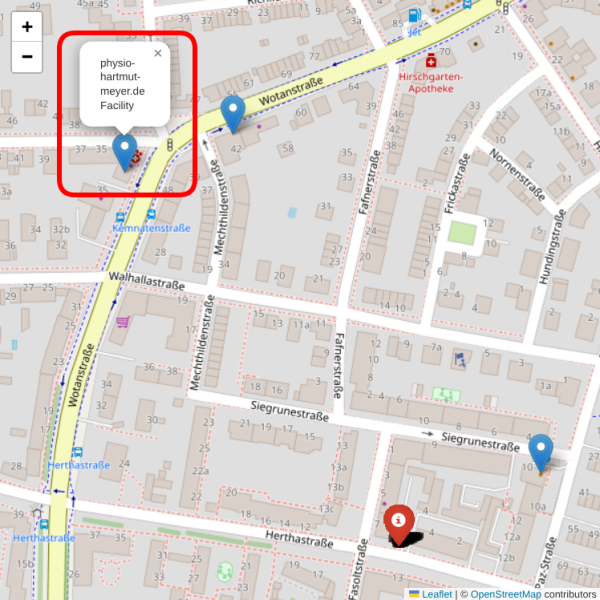

In [9]:
map_fl = folium.Map(zoom_start=14, location=[lat,lon],width=600, height=600)
folium.map.CustomPane('residence', z_index=1000).add_to(map_fl)

for item in data_visual.itertuples():
    
    folium.Marker(location=[item.lat,item.lon],
    popup=f'{item.website} {item.place_type}').add_to(map_fl)

    folium.Marker(location=[lat,lon],icon=folium.Icon(color='red'),
                  popup='User residence',pane='residence').add_to(map_fl)

map_fl.save(f'result-practical/example-visual-area.html')
    
#display(HTML(open(f'result-practical/example-visual-area.html').read()))
Image('result-practical/example-visual-area.png')

In [10]:
data_whitelist = data_whitelist.drop_duplicates(subset='website')

for item in ['Facility','Commerce','Combined']:
    
    print(item)
    if item == 'Combined':
        whitelist = data_whitelist.website
    else:
        whitelist = data_whitelist.loc[data_whitelist.place_type == item].website
    
    whitelist.to_csv(f'result-practical/example-area-whitelist-{item.lower()}.csv',index=False)
    print(f'Whitelist size {len(whitelist)}')
    print('Sample 10 records')
    print(whitelist.sample(10,random_state=0).tolist())
    #whitelist.sample(30,random_state=0).apply(lambda x: print(f'\\url{ {x} }',end=', ')) # manuscript format
    print()

Facility
Whitelist size 5042
Sample 10 records
['adbv-erding.de', 'kathis-steakhouse.de', 'fahrschule-obermaier.de', 'thecornerhouse.de', 'kinderkrippe-liberi.de', 'tobu-asianrestaurant.de', 'muenchner-volkstheater.de', 'feuerwehr-forstenried.de', 'almeida-aesthetic.com', 'pizzeria-la-piazzetta.de']

Commerce
Whitelist size 3616
Sample 10 records
['klamotte-lieblingsladen.de', 'aspectfoto.de', 'schernthaner.de', 'radlfluesterer.de', 'karosseriebau-frank.de', 'schreinerei-haeckl.de', 'rottmueller-systemholz.de', 'stattreisen-muenchen.de', 'world-of-wine.de', 'oswald-bau-weil.de']

Combined
Whitelist size 9328
Sample 10 records
['frauenaerzte-friedberg.de', 'waescheweiber.de', 'hausarztpraxis-freimann.de', 'zumbleistift-schreibwaren.de', 'fs-haberskirch.de', 'rsautotechnik.de', 'blumen-wildwuchs.de', 'metz-inning.de', 'westwind-allach.de', 'pg-tandern.de']

